Завдання 1. 

In [9]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes(as_frame=True)
df = pd.concat([diabetes.data, diabetes.target], axis=1)

print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [11]:
print(df.columns)
print(df.dtypes)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [13]:
df.fillna(df.mean(), inplace=True)
print(df.isnull().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [15]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [17]:
print(df['sex'].unique())

[ 0.05068012 -0.04464164]


In [19]:
df = df.apply(pd.to_numeric, errors='coerce')
print(df.dtypes)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


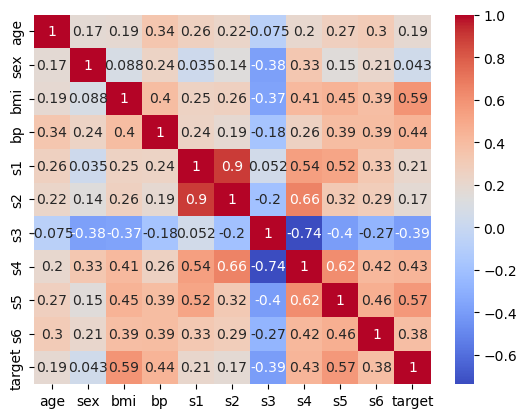

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
sorted_correlation = correlation_matrix['target'].sort_values(ascending=False)
print(sorted_correlation)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled['target'] = df['target']
print(df_scaled.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3 -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4  0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   

         s4        s5        s6  target  
0 -0.054499  0.418531 -0.370989   151.0  
1 -0.830301 -1.436589 -1.938479    75.0  
2 -0.054499  0.060156 -0.545154   141.0  
3  0.721302  0.476983 -0.196823   206.0  
4 -0.054499 -0.672502 -0.980568   135.0  


In [27]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('target', axis=1)
y = df_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(353, 10) (89, 10)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_linear = linear_model.predict(X_test)
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)
y_pred_rf = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

print(f"Лінійна рег - R^2: {linear_r2}, Сер кв похибка: {linear_mse}")
print(f"randomforest рег - R^2: {rf_r2}, Сер кв похибка: {rf_mse}")

Лінійна рег - R^2: 0.4526027629719195, Сер кв похибка: 2900.193628493482
randomforest рег - R^2: 0.4152473327779719, Сер кв похибка: 3098.1083662921346


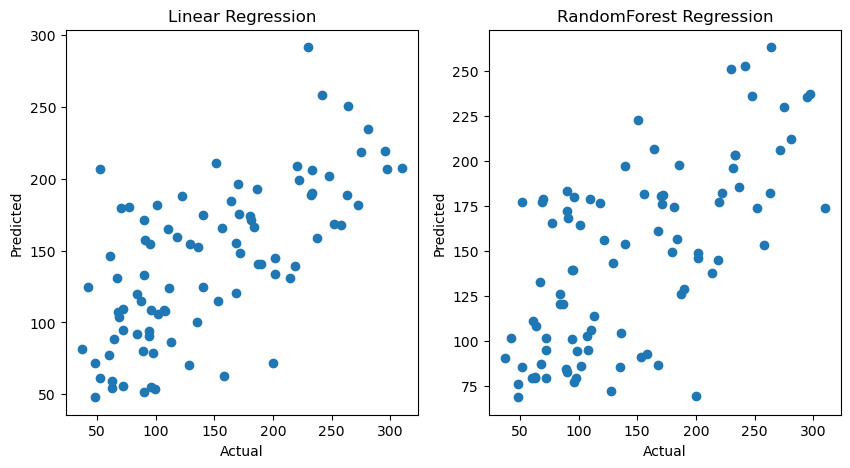

In [33]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf)
plt.title('RandomForest Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

In [35]:
predictions = pd.DataFrame({'Actual': y_test, 'Linear Predicted': y_pred_linear, 'RandomForest Predicted': y_pred_rf})
print(predictions.head())

     Actual  Linear Predicted  RandomForest Predicted
287   219.0        139.547558                  144.71
211    70.0        179.517208                  178.62
72    202.0        134.038756                  145.90
321   230.0        291.417029                  251.27
73    111.0        123.789659                  106.24


Висновки: Обидві моделі, лінійна регресія та RandomForest, дали схожі результати, показуючи середню точність прогнозування прогресу діабету, причому найбільший вплив на результат мали показники BMI та s5.

Завдання 2.

In [49]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [55]:
print(df.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [57]:
print(df.duplicated().sum())

0


In [59]:
print(df.dtypes)

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


In [61]:
correlation_matrix = df.corr()
sort_correlation = correlation_matrix['MedHouseVal'].sort_values(ascending=False)
print(sort_correlation)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


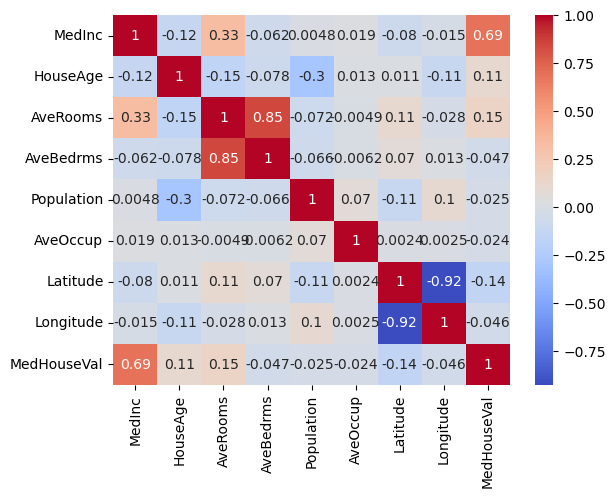

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [65]:
scaler = StandardScaler()
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[ 2.34476576  0.98214266  0.62855945 -0.15375759 -0.9744286  -0.04959654
   1.05254828 -1.32783522]
 [ 2.33223796 -0.60701891  0.32704136 -0.26333577  0.86143887 -0.09251223
   1.04318455 -1.32284391]
 [ 1.7826994   1.85618152  1.15562047 -0.04901636 -0.82077735 -0.02584253
   1.03850269 -1.33282653]
 [ 0.93296751  1.85618152  0.15696608 -0.04983292 -0.76602806 -0.0503293
   1.03850269 -1.33781784]
 [-0.012881    1.85618152  0.3447108  -0.03290586 -0.75984669 -0.08561576
   1.03850269 -1.33781784]]


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(16512, 8) (4128, 8)


In [71]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid.fit(X_train, y_train)

ridge_model = Ridge()
ridge_params = {'alpha': [0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10]})

Лінійна рег - R^2: 0.575787706032451, Сер кв похибка: 0.5558915986952442
Рандомфорест рег - R^2: 0.8056468781366565, Сер кв похибка: 0.25468207583887303
Рідж рег - R^2: 0.575790797939491, Сер кв похибка: 0.555887547032499


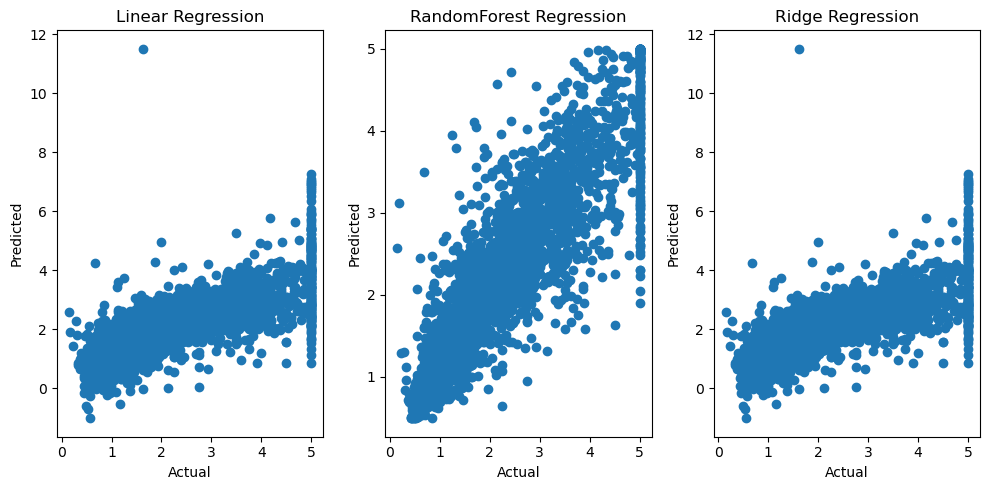

In [77]:
y_pred_linear = linear_model.predict(X_test)
linear_r2 = r2_score(y_test, y_pred_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)

y_pred_rf = rf_grid.best_estimator_.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)

y_pred_ridge = ridge_grid.best_estimator_.predict(X_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)

print(f"Лінійна рег - R^2: {linear_r2}, Сер кв похибка: {linear_mse}")
print(f"Рандомфорест рег - R^2: {rf_r2}, Сер кв похибка: {rf_mse}")
print(f"Рідж рег - R^2: {ridge_r2}, Сер кв похибка: {ridge_mse}")

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf)
plt.title('RandomForest Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge)
plt.title('Ridge Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

In [79]:
predictions = pd.DataFrame({
    'Справжні': y_test, 
    'Лінійна прогноз': y_pred_linear, 
    'рандомфорест прогноз': y_pred_rf, 
    'рідж прогноз': y_pred_ridge
})

print(predictions.head())

       Справжні  Лінійна прогноз  рандомфорест прогноз  рідж прогноз
20046   0.47700         0.719123              0.502369      0.719158
3024    0.45800         1.764017              0.738781      1.763999
15663   5.00001         2.709659              4.891107      2.709621
20484   2.18600         2.838926              2.535699      2.838910
9814    2.78000         2.604657              2.253975      2.604610


Висновки: 
Обидві моделі, лінійна регресія, Ridge і RandomForest, показали схожі результати, але модель рандомфорест дала кращі показники R^2 та MSE, що свідчить про її вищу точність при прогнозуванні вартості житла у Каліфорнії.